In [1]:
import numpy as np
import matplotlib.pyplot as plt

from lightkurve import search_targetpixelfile
from lightkurve import KeplerTargetPixelFile

from photutils.psf import IntegratedGaussianPRF, DAOGroup
from photutils.background import MMMBackground, MADStdBackgroundRMS
from photutils.psf import BasicPSFPhotometry

from photutils.detection import find_peaks
from photutils.psf import EPSFStar, EPSFStars, EPSFBuilder

from astropy.modeling.fitting import LevMarLSQFitter, LinearLSQFitter
from astropy.stats import gaussian_sigma_to_fwhm
from astropy.table import Table

In [2]:
from copy import deepcopy
import pickle

In [185]:
with open('data/single_targets_channel29_c07.txt', 'r') as f:
    stars = []
    for line in f:
        print(line)
        TPF = search_targetpixelfile(line).download()
        image = TPF.flux[index,:,:]
        peak = find_peaks(image,box_size=5,npeaks=1,threshold=0.5*np.nanmean(image)).to_pandas().iloc[0]
        stars.append(EPSFStar(image,cutout_center=(peak.x_peak,peak.y_peak)))
        print(len(stars))
        pickle.dump(stars, open( "data/stars29.p", "wb" ))

218843971

1
218856189

2
218864892

3
218884924

4
218910907

5
218914535

6
218916923

7
218918826

8
218933140

9
218942118

10
218946688

11
218952188

12
218963431

13
218965745

14
218967024

15
218971693

16
218979353

17
218985855

18
218986084

19
218986703

20
218987509

21
218988659

22
218989460

23
218989655

24
218990306

25
218990401

26
218994179

27
218996955

28
218998314

29
219000485

30
219004362

31
219005894

32
219011883

33
219013024

34
219013697

35
219015324

36
219016116

37
219020833

38
219026085

39
219026212

40
219031467

41
219034422

42
219034971

43
219035181

44
219037633

45
219039523

46
219039609

47
219039768

48
219039911

49
219042731

50
219053763

51
219055784

52
219056975

53
219057253

54
219058449

55
219060112

56
219060305

57
219062123

58
219064989

59
219070154

60
219072616

61
219073502

62
219079131

63
219080844

64
219083481

65
219088599

66
219092257

67
219096230

68
219098524

69
219100036

70
219101557

71
219101607

72
2

In [12]:
stars = pickle.load(open("data/stars29.p", "rb"))
stars = EPSFStars(stars)
epsfb = EPSFBuilder(oversampling=1.5,shape=5)
epsf, fitted_stars = epsfb(stars)

In [5]:
import matplotlib.pyplot as plt


In [14]:
pickle.dump(epsf, open( "data/epsf29_5pix.p", "wb" ))

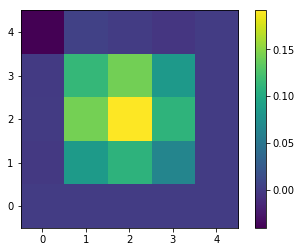

In [13]:
#norm = simple_norm(epsf.data, 'log', percent=99.)
plt.imshow(epsf.data,  origin='lower', cmap='viridis')#[6:50,87:133]
plt.colorbar()

In [ ]:
epsfb